# I. Algorithm

## 1. Mathematics
### Logistic Regression:
Logistic Regression in matrix form.
$$\hat{y} = f(\mathbf{x}) = \theta(\mathbf{w}^T\mathbf{x})$$
Note: 
- $\theta$ is logistic function (activation function).

### Activation functions and its derivative:
__Sigmoid function:__
- Formula:
$$\sigma(z) = \frac{1}{1 + e^{-z}}~~~(1)$$
- Derivative:
$$\sigma'(z) = \left(\frac{1}{1 + e^{-z}}\right)'$$
$$= \frac{e^{-z}}{(1 + e^{-z})^2}$$ 
$$= \frac{1}{(1 + e^{-z})} \frac{e^{-z}}{(1 + e^{-z})}$$
$$= \frac{1}{(1 + e^{-z})} \left(\frac{1+e^{-z}}{(1 + e^{-z})}- \frac{1}{1+e^{-z}}\right)$$
$$= \sigma(z) (1-\sigma(z))$$

__Tanh function:__
- Formula:
$$\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}~~~(2)$$
- Derivative:
$$\tanh'(z) = \left(\frac{e^z - e^{-z}}{e^z + e^{-z}}\right)'$$
$$= \frac{(e^z - e^{-z})'(e^z + e^{-z}) - (e^z - e^{-z})(e^z + e^{-z})'}{(e^z + e^{-z})^2}$$ 
$$= \frac{(e^z + e^{-z})(e^z + e^{-z}) - (e^z - e^{-z})(e^z - e^{-z})}{(e^z + e^{-z})^2}$$
$$= \left(\frac{e^z + e^{-z}}{e^z + e^{-z}}\right)^2 - \left(\frac{e^z - e^{-z}}{e^z + e^{-z}}\right)^2$$
$$= 1 - \tanh(z)^2$$


###  Loss function:
The loss function is entropy formula.
$$J(\mathbf{w}) = -\log P(\mathbf{y}|\mathbf{X}; \mathbf{w})$$
$$= -\sum_{i=1}^N(y_i \log {z}_i + (1-y_i) \log (1 - {z}_i))$$

### Optimize:
$$\begin{eqnarray}
\frac{\partial J(\mathbf{w}; \mathbf{x}_i, y_i)}{\partial \mathbf{w}} &=& -(\frac{y_i}{z_i} - \frac{1- y_i}{1 - z_i} ) \frac{\partial z_i}{\partial \mathbf{w}} \\
&=& \frac{z_i - y_i}{z_i(1 - z_i)} \frac{\partial z_i}{\partial \mathbf{w}}\\
&=& \frac{z_i - y_i}{z_i(1 - z_i)} \frac{\partial z_i}{\partial s} \mathbf{x}\\
\end{eqnarray}$$
Note:
- $\frac{\partial z_i}{\partial \mathbf{w}} = \frac{\partial z_i}{\partial s} \frac{\partial s}{\partial \mathbf{w}} = \frac{\partial z_i}{\partial s} \mathbf{x}$
- $\frac{\partial z_i}{\partial s} = f(a)'$  is the derivative calculated above with $a = \mathbf{w}^T\mathbf{x}$.
    - sigmoid function: $\frac{\partial J(\mathbf{w}; \mathbf{x}_i, y_i)}{\partial \mathbf{w}} = (z_i - y_i)\mathbf{x}_i~~~(4)$
    - tanh function: $\frac{\partial J(\mathbf{w}; \mathbf{x}_i, y_i)}{\partial \mathbf{w}} = \frac{(z_i - y_i)(1 + z_i)\mathbf{x}_i}{z_i}~~~(5)$

## 2.Code
- Step 1 Use the formular $(1)(2)(3)$ to create function which calculate activation functions.
- Step 2: Use the formular $(4)(5)(6)$ to calculate $\mathbf{w}$.
- Step 3: Use the formular $(1)(2)(3)$ to calculate $\hat{y}$ based on $\mathbf{X}$ and $\mathbf{w}$.

In [84]:
import numpy as np

class LogisticRegression(object):
    def __init__(self, iteration = 1000, eta = 0.05, activation = "sigmoid"):
        self.X_train = np.array([])
        self.y_train = np.array([])
        self.X_predict = np.array([])
        self.y_predict = np.array([])
        self.theta = np.array([])
        self.iteration = iteration
        self.eta = eta
        self.activation = activation

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    # Step 1: Calculate activation functions
    def sigmoid(self, X):
        return 1/(1 + np.exp(-X))
    def tanh(self, X):
        return np.tanh(X) 
    
    # Step 2: Calculate theta      
    def calculate_theta(self, eta=0.05):
        X_bar = np.concatenate((np.ones((self.X_train.shape[0], 1)), self.X_train), axis=1)
        N, d = X_bar.shape[0], X_bar.shape[1]
        self.theta = np.zeros(d)
        for iter in range(self.iteration):
            Z = self.sigmoid(X_bar.dot(self.theta))
            derivative = X_bar.T.dot((Z - self.y_train))
            self.theta -= eta*derivative
    # Step 3: Calculate y_hat
    def predict(self, X_predict):
        self.calculate_theta()
        self.X_predict = X_predict
        X_bar_predict = np.concatenate((np.ones((self.X_predict.shape[0], 1)), self.X_predict), axis=1)
        if self.activation == "sigmoid":
            self.y_predict = self.sigmoid(X_bar_predict.dot(self.theta))
        elif self.activation == "tanh":
            self.y_predict = (self.tanh(X_bar_predict.dot(self.theta)) + 1)/2
        self.y_predict[self.y_predict < 0.5] = 0
        self.y_predict[self.y_predict >= 0.5] = 1
        return self.y_predict.astype(np.int32)

# II. Practice

Predict whether student pass or not based on the number of time they spend on studying.

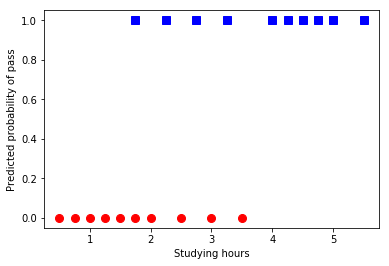

In [93]:
# Create data
X_train = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]).reshape(-1,1)
y_train = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
# Plot data
import matplotlib.pyplot as plt
X0 = X_train[np.where(y_train == 0),0][0]
y0 = y_train[np.where(y_train == 0)]
X1 = X_train[np.where(y_train == 1),0][0]
y1 = y_train[np.where(y_train == 1)]
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.xlabel('Studying hours')
plt.ylabel('Predicted probability of pass')
plt.show()

[0 0 1 1]


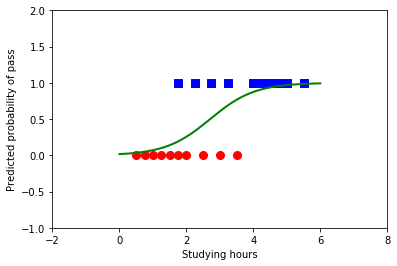

In [94]:
# Create model
model = LogisticRegression(activation = "sigmoid")
model.fit(X_train, y_train)
# Predict
X_test = np.array([0.50, 1.75, 4.25, 5.50]).reshape(-1,1)
print(model.predict(X_test))
# Plot model
X0 = X_train[np.where(y_train == 0),0][0]
y0 = y_train[np.where(y_train == 0)]
X1 = X_train[np.where(y_train == 1),0][0]
y1 = y_train[np.where(y_train == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
xx = np.linspace(0, 6, 1000)
w0 = model.theta[0]
w1 = model.theta[1]
yy = model.sigmoid(w0 + w1*xx)
# yy = (model.tanh(w0 + w1*xx)+1)/2
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.xlabel('Studying hours')
plt.ylabel('Predicted probability of pass')
plt.show()

[0 0 1 1]


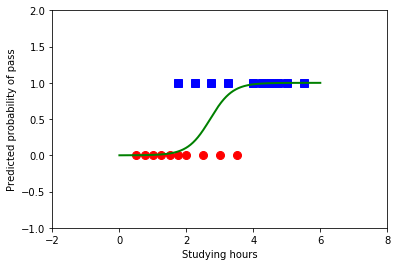

In [95]:
# Create model
model = LogisticRegression(activation = "tanh")
model.fit(X_train, y_train)
# Predict
X_test = np.array([0.50, 1.75, 4.25, 5.50]).reshape(-1,1)
print(model.predict(X_test))
# Plot model
X0 = X_train[np.where(y_train == 0),0][0]
y0 = y_train[np.where(y_train == 0)]
X1 = X_train[np.where(y_train == 1),0][0]
y1 = y_train[np.where(y_train == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
xx = np.linspace(0, 6, 1000)
w0 = model.theta[0]
w1 = model.theta[1]
yy = (model.tanh(w0 + w1*xx)+1)/2
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.xlabel('Studying hours')
plt.ylabel('Predicted probability of pass')
plt.show()

# III. References

Machine Learning cơ bản - Bài 10: Logistic Regression[https://machinelearningcoban.com/2017/01/27/logisticregression/]